In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# قراءة الملف
file_path = r"C:\Users\Nagham\Downloads\GP_2\AI model\final_data.xlsx"  # استبدل بالمسار الخاص بك
df = pd.read_excel(file_path)

In [78]:
# حساب عدد مرات تكرار كل تخصص
major_counts = df['major'].value_counts()

In [79]:
# عرض النتائج
print("Count of each major:")
print(major_counts)

Count of each major:
major
psychology                2308
languages                  686
management                 527
education                  416
nursing                    323
art                        274
mass communication         244
computer science           225
accounting                 223
engineering                222
criminalogy                209
civil engineering          184
economy                    183
counseling                 179
project management         158
history                    153
marketing                  150
law                        143
finance                    134
math                       132
music                      126
sociology                  123
political science          118
science                    118
social work                117
mechanical engineering     116
electrical engineering     109
health science             108
human resources            102
Name: count, dtype: int64


In [80]:
# إذا أردت تحويل النتائج إلى DataFrame لسهولة العرض
major_counts_df = major_counts.reset_index()
major_counts_df.columns = ['Major', 'Count']

In [81]:
print("\nCounts as DataFrame:")
print(major_counts_df)


Counts as DataFrame:
                     Major  Count
0               psychology   2308
1                languages    686
2               management    527
3                education    416
4                  nursing    323
5                      art    274
6       mass communication    244
7         computer science    225
8               accounting    223
9              engineering    222
10             criminalogy    209
11       civil engineering    184
12                 economy    183
13              counseling    179
14      project management    158
15                 history    153
16               marketing    150
17                     law    143
18                 finance    134
19                    math    132
20                   music    126
21               sociology    123
22       political science    118
23                 science    118
24             social work    117
25  mechanical engineering    116
26  electrical engineering    109
27          health science

In [82]:
# حساب عدد مرات تكرار كل تخصص
major_counts = df['major'].value_counts()

In [83]:
# تحديد أعلى 10 تخصصات بناءً على القيم الأقرب لبعضها
top_majors = major_counts[:10]  # تحديد أعلى 10
min_count = top_majors.min()    # أقل قيمة في التخصصات العشرة
balanced_majors = top_majors[top_majors <= min_count + 100]  # اختيار القيم المتقاربة (فرق لا يزيد عن 100)

In [84]:
# عرض النتائج
print("Top balanced majors:")
print(balanced_majors)

Top balanced majors:
major
art                   274
mass communication    244
computer science      225
accounting            223
engineering           222
Name: count, dtype: int64


In [85]:
# تصفية البيانات بناءً على التخصصات المتوازنة
balanced_data = df[df['major'].isin(balanced_majors.index)]

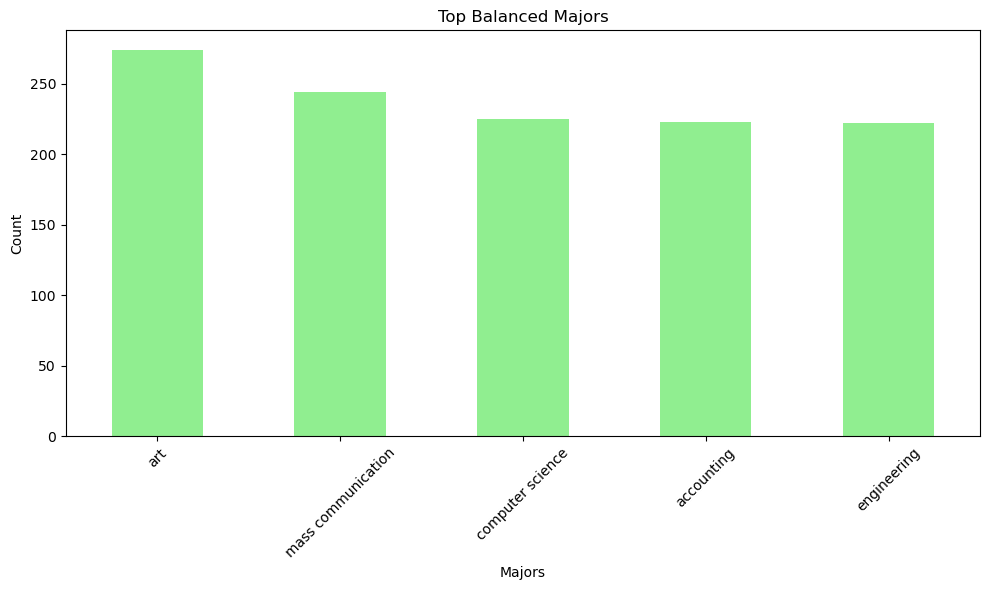

In [86]:
# رسم مخطط شريطي للتخصصات المتوازنة
plt.figure(figsize=(10, 6))
balanced_majors.plot(kind='bar', color='lightgreen')
plt.title("Top Balanced Majors")
plt.xlabel("Majors")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
# تحديد أسماء التخصصات الخمسة
selected_majors = balanced_majors.index  # التخصصات الخمسة بناءً على الفلترة

# تصفية البيانات للاحتفاظ بالصفوف الخاصة بالتخصصات الخمسة
filtered_df = df[df['major'].isin(selected_majors)]  # الاحتفاظ فقط بالصفوف التي تحتوي على التخصصات الخمسة

In [107]:
###############################################################################################################

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [110]:
# تقسيم البيانات إلى الميزات (X) والهدف (y)
X = filtered_df[['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']]
y = filtered_df['major']

print("عدد الصفوف بعد التصفية:", len(filtered_df))


عدد الصفوف بعد التصفية: 1188


In [111]:
# تحويل النصوص في عمود 'major' إلى أرقام باستخدام LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [112]:
# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [113]:
# ---  إنشاء وتدريب نموذج Decision Tree ---
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # يمكن تعديل max_depth حسب الحاجة
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [114]:
# --- تقييم الأداء ---
# التنبؤ على مجموعة الاختبار
y_pred = dt_model.predict(X_test)

In [115]:
# عرض النتائج
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3025210084033613

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.40      0.27        68
           1       0.41      0.53      0.47        88
           2       0.33      0.15      0.21        72
           3       0.23      0.16      0.19        63
           4       0.38      0.20      0.26        66

    accuracy                           0.30       357
   macro avg       0.31      0.29      0.28       357
weighted avg       0.32      0.30      0.29       357


Confusion Matrix:
 [[27 17  3 16  5]
 [22 47  8  3  8]
 [28 20 11  9  4]
 [30 14  5 10  4]
 [25 16  6  6 13]]


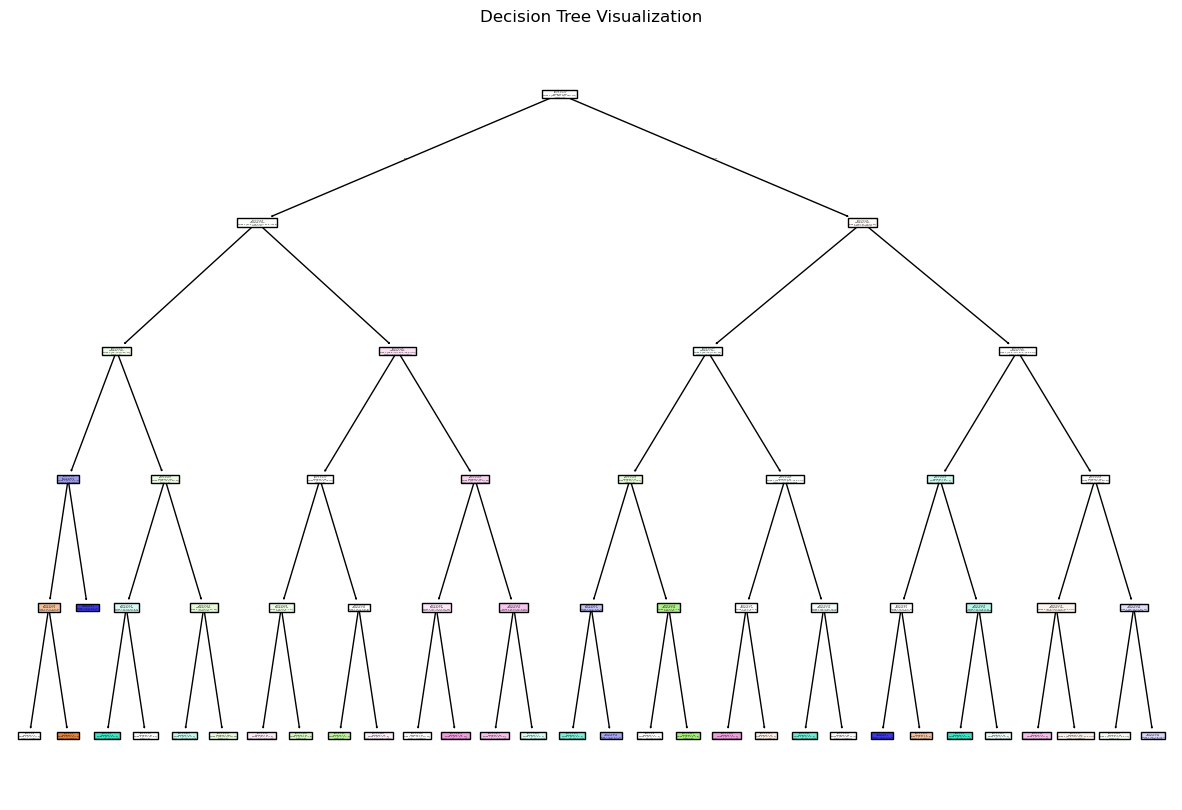

In [116]:
# --- 5. رسم الشجرة ---
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [117]:
#####################################################################################################

In [118]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [119]:
# ---  إعداد K-Fold Cross-Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # استخدام 5 طيات

In [120]:
# --- اختيار نموذج Naive Bayes ---
nb_model = GaussianNB()  # Naive Bayes المناسب للبيانات المستمرة

In [121]:
# ---  تقييم الأداء باستخدام K-Fold ---
# حساب الدقة عبر جميع الطيات
scores = cross_val_score(nb_model, X, y_encoded, cv=kf, scoring='accuracy')

In [122]:
# ---  عرض النتائج ---
print("Accuracy scores for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))

Accuracy scores for each fold: [0.35294118 0.30252101 0.28151261 0.3164557  0.34599156]
Mean Accuracy: 0.31988440945998653


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = filtered_df[['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']]
y = filtered_df['major']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

sample_input = X_test[0].reshape(1, -1)
predicted_major = model.predict(sample_input)
print(f"Predicted Major: {predicted_major[0]}")

Accuracy: 0.31
Classification Report:
                    precision    recall  f1-score   support

        accounting       0.23      0.35      0.28        43
               art       0.42      0.33      0.37        60
  computer science       0.38      0.32      0.34        47
       engineering       0.28      0.18      0.22        44
mass communication       0.29      0.36      0.32        44

          accuracy                           0.31       238
         macro avg       0.32      0.31      0.31       238
      weighted avg       0.32      0.31      0.31       238

Predicted Major: engineering
